# TP réseaux de neurones

Diane Lingrand (diane.lingrand@univ-cotedazur.fr)

Polytech SI4 - CVML - 2022-23

## imports nécessaires pour la suite

In [129]:
import matplotlib.pyplot as plt
import random
import numpy as np
from sklearn import ensemble
from sklearn.metrics import ConfusionMatrixDisplay, f1_score
from sklearn.utils import shuffle
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation 
import tensorflow.keras.utils

In [130]:
# reading the dataset
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [131]:
print("shape of x_train:", x_train.shape)
print("shape of y_train:", y_train.shape)

shape of x_train: (60000, 28, 28)
shape of y_train: (60000,)


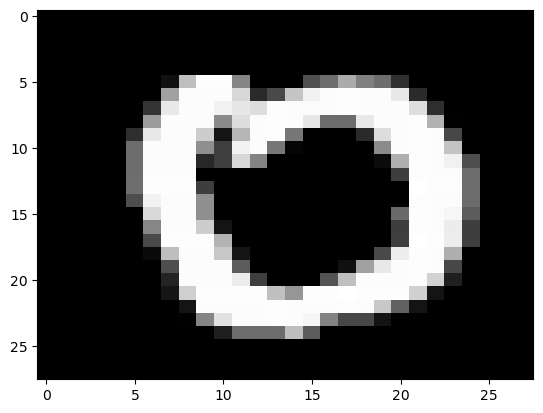

In [132]:
# display a random image from the train dataset (re-run the cell in order to change the image)
import matplotlib.pyplot as plt
i = random.randint(0,len(x_train)-1)
plt.imshow(x_train[i],aspect="auto",cmap='gray')
plt.show()

# 1. Un premier MLP

In [147]:
nbClasses=10
# Let's build a simple neural network using the keras sequential method
model = Sequential()
#topology: input as the size of data, one hidden layer with 4 neurons and usual sigmoid activation
topology = [x_train.shape[1], 4, nbClasses]
# softmax for the output using as many neurons as classes 
output_activation = 'softmax'

# first hidden layer
nbNeuronsHL = 20
model.add(Dense(nbNeuronsHL, input_dim=784, activation='sigmoid'))

# output layer
model.add(Dense(nbClasses, activation='softmax'))

In [134]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 20)                15700     
                                                                 
 dense_21 (Dense)            (None, 10)                210       
                                                                 
Total params: 15,910
Trainable params: 15,910
Non-trainable params: 0
_________________________________________________________________


In [148]:
# we need to define the loss function for the training, the optimisation method (RMSprop) and the accuracy as a metric
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [136]:
# reshape
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
y_train = tensorflow.keras.utils.to_categorical(y_train, nbClasses)
y_test = tensorflow.keras.utils.to_categorical(y_test, nbClasses)

# now, let's train for real the network: only 20 epochs and batch size of 128 (so that an epoch contains 60000/128 iterations)
model.fit(x_train, y_train, epochs=20, batch_size=128)

Epoch 1/20
469/469 [==============================] - 2s 2ms/step - loss: 1.0895 - accuracy: 0.7656
Epoch 2/20
469/469 [==============================] - 1s 2ms/step - loss: 0.4532 - accuracy: 0.8924
Epoch 3/20
469/469 [==============================] - 1s 2ms/step - loss: 0.3328 - accuracy: 0.9112
Epoch 4/20
469/469 [==============================] - 1s 2ms/step - loss: 0.2852 - accuracy: 0.9207
Epoch 5/20
469/469 [==============================] - 1s 2ms/step - loss: 0.2574 - accuracy: 0.9276
Epoch 6/20
469/469 [==============================] - 1s 2ms/step - loss: 0.2378 - accuracy: 0.9324
Epoch 7/20
469/469 [==============================] - 1s 2ms/step - loss: 0.2224 - accuracy: 0.9372
Epoch 8/20
469/469 [==============================] - 1s 2ms/step - loss: 0.2098 - accuracy: 0.9406
Epoch 9/20
469/469 [==============================] - 1s 2ms/step - loss: 0.1996 - accuracy: 0.9434
Epoch 10/20
469/469 [==============================] - 1s 2ms/step - loss: 0.1907 - accuracy: 0.9462

Que vaut le score F1?

In [137]:
# f1 score
y_pred = model.predict(x_test)
#f1 = f1_score(y_test, y_pred, average='macro')

313/313 [==============================] - 0s 1ms/step


# 2. Convergence

## A t-on laissé le temps à l'algorithme de converger?
Modifiez le nombre d'itérations. Les résultats sont-ils meilleurs?

Non. L'algo avait déjà convergé.

## Critère d'arrêt autre que le nombre d'itérations

In this small example, we decided, as a default behavior, to stop after 20 epochs. Of course this value can be changed. Another way to deal with that is to use early stopping criterion. All options are described in the keras documentation. Feel free to experiment all options!

In [139]:
from tensorflow.keras.callbacks import EarlyStopping

# we define a callback function that will control if the accuracy 
# on the validation set (a part of train set) is not changing more than 10-4 with a patience of 20 iterations
# If the last accuracy value is not the best one, we still keep the last results
# In this example, we extracted 20% of the train set for the validation set that will be used to monitor the convergence.

ourCallback = EarlyStopping(monitor='val_accuracy', min_delta=0.0001, patience=20, verbose=0, mode='auto', baseline=None, restore_best_weights=True)

# let's learn the network again !
# We do not know when the training will stop but no more than 2000 epochs.
model.fit(x_train, y_train, epochs=2000, batch_size=128, validation_split=0.2, callbacks=[ourCallback])


Epoch 1/2000
375/375 [==============================] - 1s 4ms/step - loss: 0.1412 - accuracy: 0.9596 - val_loss: 0.1301 - val_accuracy: 0.9624
Epoch 2/2000
375/375 [==============================] - 1s 3ms/step - loss: 0.1381 - accuracy: 0.9604 - val_loss: 0.1308 - val_accuracy: 0.9627
Epoch 3/2000
375/375 [==============================] - 1s 3ms/step - loss: 0.1355 - accuracy: 0.9617 - val_loss: 0.1304 - val_accuracy: 0.9622
Epoch 4/2000
375/375 [==============================] - 1s 3ms/step - loss: 0.1328 - accuracy: 0.9620 - val_loss: 0.1316 - val_accuracy: 0.9616
Epoch 5/2000
375/375 [==============================] - 1s 3ms/step - loss: 0.1306 - accuracy: 0.9627 - val_loss: 0.1305 - val_accuracy: 0.9616
Epoch 6/2000
375/375 [==============================] - 1s 3ms/step - loss: 0.1283 - accuracy: 0.9628 - val_loss: 0.1325 - val_accuracy: 0.9617
Epoch 7/2000
375/375 [==============================] - 1s 3ms/step - loss: 0.1264 - accuracy: 0.9636 - val_loss: 0.1320 - val_accuracy:

A quel 'epoch' l'algorithme s'est-il arrêté ?

22

## Evolution de la convergence

In [149]:
import os
import datetime
import matplotlib.pyplot as plt
from IPython.display import Image
from tensorflow.keras.callbacks import EarlyStopping

ourCallback = tensorflow.keras.callbacks.EarlyStopping(monitor='val_accuracy', min_delta=0.0001, patience=20, verbose=0, mode='auto', baseline=None, restore_best_weights=False)

model.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics=['accuracy'])

Epoch 1/2000
375/375 [==============================] - 2s 4ms/step - loss: 1.2186 - accuracy: 0.7377 - val_loss: 0.6782 - val_accuracy: 0.8762
Epoch 2/2000
375/375 [==============================] - 1s 3ms/step - loss: 0.5421 - accuracy: 0.8821 - val_loss: 0.4097 - val_accuracy: 0.9031
Epoch 3/2000
375/375 [==============================] - 1s 3ms/step - loss: 0.3833 - accuracy: 0.9029 - val_loss: 0.3267 - val_accuracy: 0.9156
Epoch 4/2000
375/375 [==============================] - 1s 3ms/step - loss: 0.3220 - accuracy: 0.9136 - val_loss: 0.2889 - val_accuracy: 0.9211
Epoch 5/2000
375/375 [==============================] - 1s 3ms/step - loss: 0.2881 - accuracy: 0.9210 - val_loss: 0.2648 - val_accuracy: 0.9277
Epoch 6/2000
375/375 [==============================] - 1s 3ms/step - loss: 0.2650 - accuracy: 0.9261 - val_loss: 0.2490 - val_accuracy: 0.9327
Epoch 7/2000
375/375 [==============================] - 1s 3ms/step - loss: 0.2479 - accuracy: 0.9313 - val_loss: 0.2373 - val_accuracy:

<Axes: >

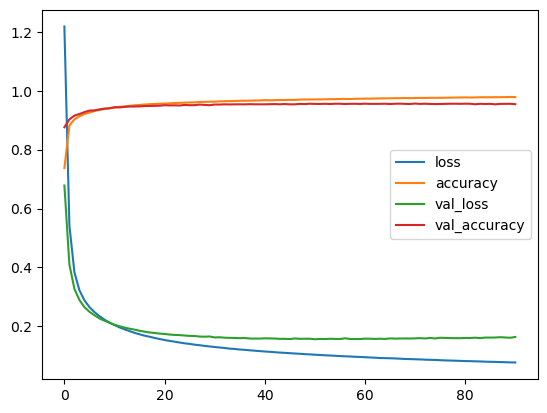

In [150]:
from pandas import DataFrame

history = model.fit(x_train, y_train, epochs=2000, batch_size=128, validation_split=0.2, callbacks=[ourCallback])
DataFrame(history.history).plot()

# 3. Changements de topologie


Est-ce qu'augmenter le nombre de neurones par couche augmente les performances?

In [152]:
model = Sequential()
model.add(Dense(nbNeuronsHL * 2, input_dim=784, activation='sigmoid'))
model.add(Dense(nbClasses, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=25, batch_size=128, validation_split=0.2)
print("Test score:", model.evaluate(x_test, y_test)[0])

Epoch 1/25
375/375 [==============================] - 2s 3ms/step - loss: 0.9338 - accuracy: 0.7944 - val_loss: 0.4353 - val_accuracy: 0.8974
Epoch 2/25
375/375 [==============================] - 1s 3ms/step - loss: 0.3798 - accuracy: 0.9013 - val_loss: 0.3078 - val_accuracy: 0.9176
Epoch 3/25
375/375 [==============================] - 1s 3ms/step - loss: 0.2995 - accuracy: 0.9166 - val_loss: 0.2636 - val_accuracy: 0.9269
Epoch 4/25
375/375 [==============================] - 1s 3ms/step - loss: 0.2613 - accuracy: 0.9259 - val_loss: 0.2379 - val_accuracy: 0.9338
Epoch 5/25
375/375 [==============================] - 1s 3ms/step - loss: 0.2354 - accuracy: 0.9326 - val_loss: 0.2210 - val_accuracy: 0.9364
Epoch 6/25
375/375 [==============================] - 1s 3ms/step - loss: 0.2154 - accuracy: 0.9385 - val_loss: 0.2077 - val_accuracy: 0.9408
Epoch 7/25
375/375 [==============================] - 1s 3ms/step - loss: 0.1993 - accuracy: 0.9434 - val_loss: 0.1963 - val_accuracy: 0.9450
Epoch 

Est-ce qu'augmenter le nombre de couches de neurones augmente les performances?

In [153]:
model = Sequential()
model.add(Dense(nbNeuronsHL, input_dim=784, activation='sigmoid'))
model.add(Dense(nbNeuronsHL, activation='sigmoid'))
model.add(Dense(nbClasses, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=25, batch_size=128, validation_split=0.2)
print("Test score:", model.evaluate(x_test, y_test)[0])

Epoch 1/25
375/375 [==============================] - 2s 4ms/step - loss: 1.7340 - accuracy: 0.6306 - val_loss: 1.1824 - val_accuracy: 0.7987
Epoch 2/25
375/375 [==============================] - 1s 3ms/step - loss: 0.8753 - accuracy: 0.8350 - val_loss: 0.6243 - val_accuracy: 0.8735
Epoch 3/25
375/375 [==============================] - 1s 3ms/step - loss: 0.5254 - accuracy: 0.8805 - val_loss: 0.4182 - val_accuracy: 0.8986
Epoch 4/25
375/375 [==============================] - 1s 3ms/step - loss: 0.3897 - accuracy: 0.9001 - val_loss: 0.3388 - val_accuracy: 0.9101
Epoch 5/25
375/375 [==============================] - 1s 3ms/step - loss: 0.3276 - accuracy: 0.9124 - val_loss: 0.2971 - val_accuracy: 0.9188
Epoch 6/25
375/375 [==============================] - 1s 3ms/step - loss: 0.2910 - accuracy: 0.9209 - val_loss: 0.2722 - val_accuracy: 0.9243
Epoch 7/25
375/375 [==============================] - 1s 3ms/step - loss: 0.2655 - accuracy: 0.9267 - val_loss: 0.2525 - val_accuracy: 0.9291
Epoch 

Si vous observez qu'en augmentant le nombre de couches cachées, les performances chutent, essayez de remplacer l'activiation 'sigmoid' par 'relu'. Est-ce mieux ?

In [154]:
model = Sequential()
model.add(Dense(nbNeuronsHL, input_dim=784, activation='relu'))
model.add(Dense(nbNeuronsHL, activation='relu'))
model.add(Dense(nbClasses, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=25, batch_size=128, validation_split=0.2)
print("Test score:", model.evaluate(x_test, y_test)[0])

Epoch 1/25
375/375 [==============================] - 2s 3ms/step - loss: 0.6663 - accuracy: 0.8129 - val_loss: 0.3160 - val_accuracy: 0.9122
Epoch 2/25
375/375 [==============================] - 1s 3ms/step - loss: 0.2876 - accuracy: 0.9183 - val_loss: 0.2563 - val_accuracy: 0.9261
Epoch 3/25
375/375 [==============================] - 1s 3ms/step - loss: 0.2373 - accuracy: 0.9327 - val_loss: 0.2106 - val_accuracy: 0.9408
Epoch 4/25
375/375 [==============================] - 1s 3ms/step - loss: 0.2095 - accuracy: 0.9404 - val_loss: 0.1960 - val_accuracy: 0.9456
Epoch 5/25
375/375 [==============================] - 1s 3ms/step - loss: 0.1915 - accuracy: 0.9454 - val_loss: 0.1826 - val_accuracy: 0.9495
Epoch 6/25
375/375 [==============================] - 1s 3ms/step - loss: 0.1760 - accuracy: 0.9500 - val_loss: 0.1728 - val_accuracy: 0.9513
Epoch 7/25
375/375 [==============================] - 1s 3ms/step - loss: 0.1643 - accuracy: 0.9525 - val_loss: 0.1671 - val_accuracy: 0.9517
Epoch 

# 4. Modifiez les données en considérant FMNIST (Fashion MNIST)

In [159]:
from tensorflow.keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

print("shape of x_train:", x_train.shape)
print("shape of y_train:", y_train.shape)

nbClasses = np.unique(y_train).shape[0]
inputDim = 784

model = Sequential()
model.add(Dense(int(inputDim  / 2) + nbClasses, input_dim=inputDim, activation='relu'))
model.add(Dense(nbClasses, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

y_train = tensorflow.keras.utils.to_categorical(y_train, nbClasses)
y_test = tensorflow.keras.utils.to_categorical(y_test, nbClasses)

history = model.fit(x_train, y_train, epochs=150, batch_size=128, validation_split=0.2)
DataFrame(history.history).plot()

print("Test score:", model.evaluate(x_test, y_test)[0])

shape of x_train: (60000, 28, 28)
shape of y_train: (60000,)
Epoch 1/100
375/375 [==============================] - 2s 5ms/step - loss: 0.5848 - accuracy: 0.7946 - val_loss: 0.4564 - val_accuracy: 0.8338
Epoch 2/100
375/375 [==============================] - 2s 5ms/step - loss: 0.4074 - accuracy: 0.8517 - val_loss: 0.3840 - val_accuracy: 0.8587
Epoch 3/100
375/375 [==============================] - 2s 5ms/step - loss: 0.3598 - accuracy: 0.8668 - val_loss: 0.3625 - val_accuracy: 0.8669
Epoch 4/100
375/375 [==============================] - 2s 5ms/step - loss: 0.3269 - accuracy: 0.8800 - val_loss: 0.3402 - val_accuracy: 0.8791
Epoch 5/100
375/375 [==============================] - 2s 5ms/step - loss: 0.3081 - accuracy: 0.8863 - val_loss: 0.3252 - val_accuracy: 0.8852
Epoch 6/100
375/375 [==============================] - 2s 4ms/step - loss: 0.2916 - accuracy: 0.8909 - val_loss: 0.3116 - val_accuracy: 0.8862
Epoch 7/100
375/375 [==============================] - 1s 4ms/step - loss: 0.2742

KeyboardInterrupt: 